In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm
import itertools
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
characters = pd.read_csv("data/character-predictions_pose.csv")

## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

In [3]:
# check for nan values
characters.isnull().sum()

S.No                    0
plod                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

### Data quality check

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

**Distribution of Continuous Variables** | Annie

In [4]:
corr = pd.DataFrame(characters.corrwith(characters['isAlive'])).sort_values(by=[0], ascending = False)
corr.rename(columns = {0:'corr'})

,corr
isAlive,1.000000
isAliveHeir,0.384900
book4,0.268975
isAliveFather,0.195992
isAliveSpouse,0.174275
age,0.087264
book5,0.032846
book3,0.006693
isNoble,-0.042211
isAliveMother,-0.043033


In [5]:
x_vars = ['name', 'title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse']
y_vars = ["isAlive"]

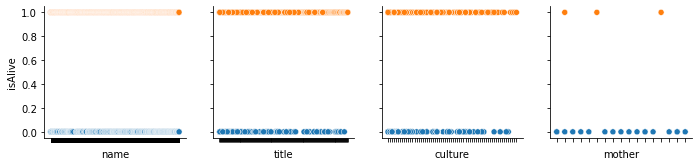

In [6]:
g = sns.PairGrid(characters, hue="isAlive", x_vars=x_vars[0:4], y_vars=y_vars).map_diag(sns.histplot, color=".3").map_offdiag(sns.scatterplot).set(xticklabels=[])
plt.show()

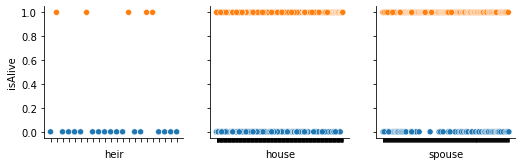

In [7]:
g = sns.PairGrid(characters, hue="isAlive", x_vars=x_vars[5:8], y_vars=y_vars).map_diag(sns.histplot, color=".3").map_offdiag(sns.scatterplot).set(xticklabels=[])
plt.show()

In [8]:
x_vars = characters.columns.to_list()
remove_lst = ['name', 'title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse']
x_vars = [x for x in x_vars if x not in remove_lst]
y_vars = ["isAlive"]

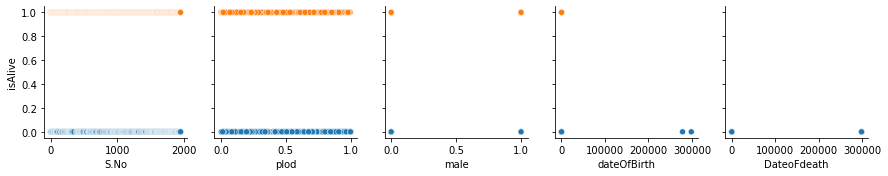

In [9]:
g = sns.PairGrid(characters, hue="isAlive", x_vars=x_vars[0:5], y_vars=y_vars).map_diag(sns.histplot, color=".3").map_offdiag(sns.scatterplot)
plt.show()

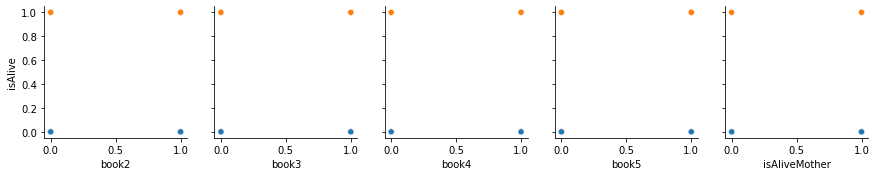

In [10]:
g = sns.PairGrid(characters, hue="isAlive", x_vars=x_vars[6:11], y_vars=y_vars).map_diag(sns.histplot, color=".3").map_offdiag(sns.scatterplot)
plt.show()

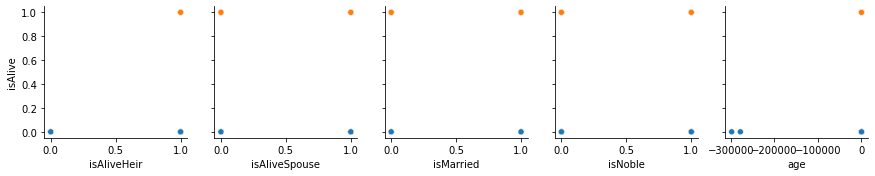

In [11]:
g = sns.PairGrid(characters, hue="isAlive", x_vars=x_vars[12:17], y_vars=y_vars).map_diag(sns.histplot, color=".3").map_offdiag(sns.scatterplot)
plt.show()

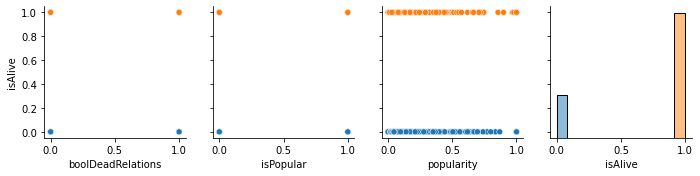

In [12]:
g = sns.PairGrid(characters, hue="isAlive", x_vars=x_vars[18:], y_vars=y_vars).map_diag(sns.histplot, color=".3").map_offdiag(sns.scatterplot)
plt.show()

**Distribution of Culture** | Divya

In [13]:
characters.culture.value_counts()

Northmen     124
Ironborn     112
Free Folk     51
Valyrian      43
Braavosi      42
            ... 
Andal          1
Norvoshi       1
Qarth          1
Lhazarene      1
The Reach      1
Name: culture, Length: 64, dtype: int64

In [14]:
len(characters.culture.unique())

65

In [15]:
characters = characters.loc[:,['name', 'male', 'house', 'isNoble', 'numDeadRelations', 'popularity', 'isAlive', 'culture', 'boolDeadRelations', 'isPopular']]
characters.dropna(inplace = True)
characters.reset_index(drop = True, inplace = True)
characters.culture = characters.culture.replace(to_replace = "northmen", value = "Northmen")
characters.culture = characters.culture.replace(to_replace = "ironborn", value = "Ironborn")
characters.culture = characters.culture.replace(to_replace = "Ironmen", value = "Ironborn")
characters.culture = characters.culture.replace(to_replace = "Asshai'i", value = "Asshai")
characters.culture = characters.culture.replace(to_replace = "Free folk", value = "Free Folk")
characters.culture = characters.culture.replace(to_replace = "free folk", value = "Free Folk")
characters.culture = characters.culture.replace(to_replace = "Summer Islands", value = "Summer Isles")
characters.culture = characters.culture.replace(to_replace = "Summer Islander", value = "Summer Isles")
characters.culture = characters.culture.replace(to_replace = "westermen", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Westerman", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Westerlands", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Vale", value = "Valemen")
characters.culture = characters.culture.replace(to_replace = "Lhazareen", value = "Lhazarene")
characters.culture = characters.culture.replace(to_replace = "The Reach", value = "Reach")
characters.culture = characters.culture.replace(to_replace = "Reachmen", value = "Reach")
characters.culture = characters.culture.replace(to_replace = "Qarth", value = "Qartheen")
characters.culture = characters.culture.replace(to_replace = "Lyseni", value = "Lysene")
characters.culture = characters.culture.replace(to_replace = "Stormlander", value = "Stormlands")
characters.culture = characters.culture.replace(to_replace = "Meereenese", value = "Meereen")
characters.culture = characters.culture.replace(to_replace = "Astapor", value = "Astapori")
characters.culture = characters.culture.replace(to_replace = "Norvos", value = "Norvoshi")
characters.culture = characters.culture.replace(to_replace = "Wildlings", value = "Wildling")
characters.culture = characters.culture.replace(to_replace = "Andals", value = "Andal")
characters.culture = characters.culture.replace(to_replace = "Braavos", value = "Braavosi")
characters.culture = characters.culture.replace(to_replace = "Dorne", value = "Dornish")
characters.culture = characters.culture.replace(to_replace = "Dornishmen", value = "Dornish")
characters.culture = characters.culture.replace(to_replace = "Ghiscaricari", value = "Ghiscari")

In [16]:
culture_counts = pd.DataFrame(characters.culture.value_counts()).reset_index()
survival_counts = pd.DataFrame(characters.groupby(['culture']).isAlive.value_counts())
survival_counts.rename({'isAlive':'count_survived'}, axis='columns', inplace=True)
survival_counts = pd.DataFrame(survival_counts.to_records())
#for Qohor and Astapori, no one survived — this will be taken into account later and for now they will be dropped
survival_counts = survival_counts[survival_counts['isAlive'] == 1] 
survival_counts.drop(columns=["isAlive"], inplace=True)
culture_counts = culture_counts.rename(columns={'index':'culture', "culture" : "total"})
survival_df = culture_counts.merge(survival_counts)
survival_df['percent_survived'] = (survival_df['count_survived']/survival_df['total'])*100
survival_df = survival_df.sort_values(by=['percent_survived'], ascending=False)
characters.culture = characters.culture.replace(to_replace = ['Ibbenese', 'Asshai', 'Lhazarene', 'Summer Isles', 'First Men', 'Naathi', 'Norvoshi', 'Rhoynar', 'Crannogmen'], value = "all_survive")
characters.culture = characters.culture.replace(to_replace = ['Ironborn', 'Ghiscari', 'Vale mountain clans', 'Dornish', 'Reach'], value = "most_survive")
characters.culture = characters.culture.replace(to_replace = ['Dothraki', 'Stormlands', 'Rivermen', 'Braavosi', 'Northmen'], value = "many_survive")
characters.culture = characters.culture.replace(to_replace = ['Qartheen', 'Myrish', 'Lysene', 'Valemen', 'Northern mountain clans', 'Tyroshi', 'Westeros'], value = "morethanhalf_survive")
characters.culture = characters.culture.replace(to_replace = ['Westermen', 'Riverlands', 'Pentoshi', 'Free Folk', 'Sistermen', 'Meereen'], value = "half_survive")
characters.culture = characters.culture.replace(to_replace = ['Riverlands', 'Lysene', 'Valyrian'], value = "few_survive")
characters.culture = characters.culture.replace(to_replace = ['Wildling', 'Valyrian'], value = "few_survive")
characters.culture = characters.culture.replace(to_replace = ['Astapori', 'Qohor'], value = "none_survive")
culture_counts = pd.DataFrame(characters.culture.value_counts()).reset_index()
culture_counts = culture_counts.rename(columns={'index':'culture_bin', "culture" : "count"})
culture_counts

,culture_bin,count
0,most_survive,186
1,many_survive,167
2,morethanhalf_survive,49
3,few_survive,44
4,half_survive,29
5,all_survive,15
6,none_survive,3


**Distribution of House** | Charles

In [17]:
# Charles
characters.house.value_counts()

House Stark                          60
House Targaryen                      42
House Greyjoy                        28
House Martell                        18
House Botley                         12
                                     ..
House Webber                          1
House Toland                          1
House Goodbrother of Shatterstone     1
House Manderly                        1
Chataya's brothel                     1
Name: house, Length: 145, dtype: int64

In [18]:
len(characters.house.unique())

145

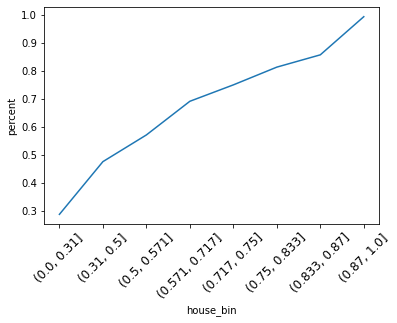

In [19]:
for house in characters.house:
    percent_alive = characters[characters.house == house].isAlive.mean()
    characters.loc[characters.house == house, 'house_alive'] = percent_alive

# Bin house_alive into 5 bins
binned_house_alive = pd.qcut(characters['house_alive'],10,retbins=True, duplicates = 'drop')
bins = binned_house_alive[1]
characters['house_alive_binned'] = pd.cut(characters['house_alive'],bins = bins)
dum = pd.get_dummies(characters.house_alive_binned,drop_first = True)
dum.columns = ['house_alive'+str(x) for x in range(1,len(bins)-1)]
characters = pd.concat([characters,dum], axis = 1)

# Linechart for House Bins
house_survival = characters.groupby('house_alive_binned')['isAlive'].agg([('percent','mean'),('nobs','count')]).reset_index(drop=False)
intervals = house_survival.house_alive_binned.to_list()
intervals_string = []
for i in range(len(intervals)):
    string = str(intervals[i])
    intervals_string.append(string)
    
house_chart = sns.lineplot(x = intervals_string, y= house_survival['percent'])
plt.xlabel('house_bin')
house_chart.set_xticks(intervals_string)
house_chart.set_xticklabels(intervals_string, rotation=45, size=12)
plt.show()

In [20]:
characters_clean_copy = characters.copy()

In [22]:
characters_clean = pd.read_csv("data/character-predictions_pose.csv")

**Distribution of Age binned** | Annie

In [24]:
characters_clean.age.value_counts()

100.0    29
19.0     19
22.0     16
21.0     15
20.0     14
         ..
61.0      1
85.0      1
2.0       1
59.0      1
1.0       1
Name: age, Length: 85, dtype: int64

In [25]:
len(characters_clean.age.unique())

86

In [27]:
age = characters_clean.copy()
age.dropna(subset=['age'], inplace = True)

# fixing incorrect (negative) ages with correct ages from online research
age.at[1684,'age'] = 0
age.at[1868,'age'] = 25

# adding column for the decade of characters' lives
age['decade'] = age['age'].apply(lambda x: 
                                 'first' if x < 10
                                 else 'second' if x >= 10 and x < 20
                                 else 'third' if x >= 20 and x < 30
                                 else 'fourth' if x >= 30 and x < 40
                                 else 'fifth' if x >= 40 and x < 50
                                 else 'sixth' if x >= 50 and x < 60
                                 else 'seventh' if x >= 60 and x < 70
                                 else 'eighth' if x >= 70 and x < 80
                                 else 'ninth' if x >= 80 and x < 90
                                 else 'tenth' if x >= 90 and x < 100
                                                   else '100')

# characters grouped by age 
age_count = pd.DataFrame(characters_clean.groupby('age').count().isAlive)
age_count.rename(columns={'isAlive': 'count_total'}, inplace = True)
age_alive = pd.DataFrame(characters_clean.groupby('age').sum().isAlive)
age_alive.rename(columns={'isAlive': 'count_alive'}, inplace = True)
age_distribution = pd.concat([age_alive, age_count], axis = 1)
age_distribution['perc_alive'] = np.divide(age_distribution.count_alive, age_distribution.count_total)

# characters grouped by age decade
decade_count = pd.DataFrame(age.groupby('decade').count().isAlive)
decade_count.rename(columns={'isAlive': 'count_total'}, inplace = True)
decade_alive = pd.DataFrame(age.groupby('decade').sum().isAlive)
decade_alive.rename(columns={'isAlive': 'count_alive'}, inplace = True)
decade_distribution = pd.concat([decade_alive, decade_count], axis = 1)
decade_distribution['perc_alive'] = np.divide(decade_distribution.count_alive, decade_distribution.count_total)

In [28]:
age_distribution.head(3)

,count_alive,count_total,perc_alive
age,,,
-298001.0,0,1,0.0
-277980.0,0,1,0.0
0.0,0,2,0.0


In [29]:
decade_distribution.head(3)

,count_alive,count_total,perc_alive
decade,,,
100,0,29,0.000000
eighth,6,11,0.545455
fifth,29,45,0.644444


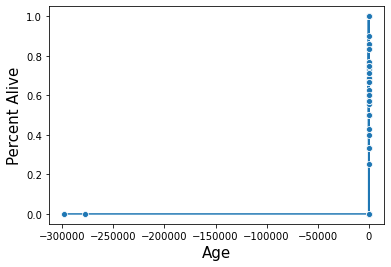

In [30]:
age_chart = sns.lineplot(data=age_distribution, x=age_distribution.index, y=age_distribution.perc_alive, marker='o')
age_chart.set_xlabel('Age', fontdict={'size': 15})
age_chart.set_ylabel('Percent Alive', fontdict={'size': 15})
plt.show()

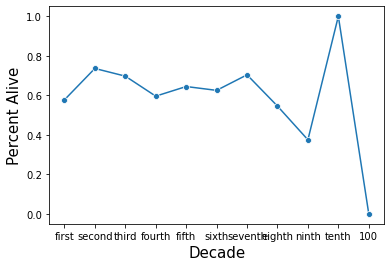

In [31]:
decade_distribution.index = pd.Categorical(decade_distribution.index,
                                   categories=['first', 'second', 'third', 'fourth', 'fifth', 'sixth',
                                              'seventh', 'eighth', 'ninth', 'tenth', '100'],
                                   ordered=True)

decade_chart = sns.lineplot(data=decade_distribution, x=decade_distribution.index, y=decade_distribution.perc_alive, marker='o')
decade_chart.set_xlabel('Decade', fontdict={'size': 15})
decade_chart.set_ylabel('Percent Alive', fontdict={'size': 15})
plt.show()

## Data cleaning and preparation



**Data Cleaning** | Divya

From the data quality check we realized that:

1. `Culture` and `house` were central predictors we were planning to use, but had more than 65% and and 20% missing values respectively. It is very difficult to impute their values because it is a categorical variable for fictional characaters. The values would likely be missing for less important characters, so we removed such columns from the data. We also subset our original dataframe with the columns we used as predictors.

2. The column `culture` has values that should be categorized under the same value but were noted with different spellings. This would distort our count of how many people are in each culture so we correctly grouped the same values together. 

3. The columns `culture` and `house` needed to be binned according to what percentage of the culture or house survived because then the binned categories would have the strongest relationship with isAlive

In [32]:
characters.culture = characters.culture.replace(to_replace = "northmen", value = "Northmen")
characters.culture = characters.culture.replace(to_replace = "ironborn", value = "Ironborn")
characters.culture = characters.culture.replace(to_replace = "Ironmen", value = "Ironborn")
characters.culture = characters.culture.replace(to_replace = "Asshai'i", value = "Asshai")
characters.culture = characters.culture.replace(to_replace = "Free folk", value = "Free Folk")
characters.culture = characters.culture.replace(to_replace = "free folk", value = "Free Folk")
characters.culture = characters.culture.replace(to_replace = "Summer Islands", value = "Summer Isles")
characters.culture = characters.culture.replace(to_replace = "Summer Islander", value = "Summer Isles")
characters.culture = characters.culture.replace(to_replace = "westermen", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Westerman", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Westerlands", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Vale", value = "Valemen")
characters.culture = characters.culture.replace(to_replace = "Lhazareen", value = "Lhazarene")
characters.culture = characters.culture.replace(to_replace = "The Reach", value = "Reach")
characters.culture = characters.culture.replace(to_replace = "Reachmen", value = "Reach")
characters.culture = characters.culture.replace(to_replace = "Qarth", value = "Qartheen")
characters.culture = characters.culture.replace(to_replace = "Lyseni", value = "Lysene")
characters.culture = characters.culture.replace(to_replace = "Stormlander", value = "Stormlands")
characters.culture = characters.culture.replace(to_replace = "Meereenese", value = "Meereen")
characters.culture = characters.culture.replace(to_replace = "Astapor", value = "Astapori")
characters.culture = characters.culture.replace(to_replace = "Norvos", value = "Norvoshi")
characters.culture = characters.culture.replace(to_replace = "Wildlings", value = "Wildling")
characters.culture = characters.culture.replace(to_replace = "Andals", value = "Andal")
characters.culture = characters.culture.replace(to_replace = "Braavos", value = "Braavosi")
characters.culture = characters.culture.replace(to_replace = "Dorne", value = "Dornish")
characters.culture = characters.culture.replace(to_replace = "Dornishmen", value = "Dornish")
characters.culture = characters.culture.replace(to_replace = "Ghiscaricari", value = "Ghiscari")

**Data Preparation** -- Catherine

The data was prepared for forward selection by creating dummy variables for characters — this step is displayed in the "Developing the Model" section, as it was a part of forward selection. 

## Exploratory data analysis -- shift some code from somewhere above to here??

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

In [33]:
characters.shape

(493, 19)

In [35]:
# create dataframe for continuous predictors with
# (1) correlation to isAlive (2) count of nan values 

corr = pd.DataFrame(characters.corrwith(characters['isAlive'])).sort_values(by=[0], ascending = False)
corr.rename(columns = {0:'corr'})
corr = corr.abs()

nans = pd.DataFrame(characters.isnull().sum())
nans.rename(columns = {0:'NA_count'})

eda = corr.merge(nans, how = 'left', left_index = True, right_index = True)
eda.rename(columns = {'0_x':'corr', '0_y':'NA_count'}, inplace = True)
eda.sort_values(by=['corr'], ascending = False)

# note: plod is a predicted value used by the creators of the dataset, so we are not including it

,corr,NA_count
isAlive,1.000000,0
house_alive,0.607036,0
house_alive7,0.419330,0
house_alive1,0.186736,0
boolDeadRelations,0.170938,0
numDeadRelations,0.145381,0
house_alive5,0.104926,0
male,0.093552,0
isNoble,0.089122,0
house_alive6,0.058689,0


## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

In [36]:
# Catherine

# HELPER FUNCTIONS FOR TESTING

def bin_opp(num):
    return 1 if num==0 else 0

def test_person(name, formula, data = characters):
    train = data.loc[data['name'] != name]
    person = data.loc[data['name'] == name]
    model = sm.logit(formula = formula, data=data).fit(disp=0, method='bfgs')
    prediction = model.predict(person)
    return prediction.values[0], person["isAlive"].values[0]

def test(formula, num_examples=50, loss_func=None, cutoff=.3, clean_data=characters):
    accurate_counter = 0
    mat_state = [[0,0],[0,0]]
    for index, row in clean_data.iterrows():
        p, act = test_person(row['name'], formula, data = clean_data)
        if p + cutoff >= 1:
            bin_p = 1
        else:
            bin_p = 0
        mat_state[bin_opp(bin_p)][bin_opp(act)] += 1
        if index >= num_examples:
            break
    if loss_func is None:
        return mat_state[0][0]+mat_state[1][1], mat_state, sm.logit(formula=formula, data=clean_data).fit(method='bfgs', disp=0)
    else:
        return loss_func(accurate_counter), mat_state, sm.logit(formula=formula, data=clean_data).fit(method='bfgs', disp=0)

isAlive~male
isAlive~isNoble
isAlive~numDeadRelations
isAlive~popularity
isAlive~boolDeadRelations
isAlive~isPopular
isAlive~house_alive1
isAlive~house_alive2
isAlive~house_alive3
isAlive~house_alive4
isAlive~house_alive5
isAlive~house_alive6
isAlive~house_alive7
isAlive~culture_all_survive
isAlive~culture_few_survive
isAlive~culture_half_survive
isAlive~culture_many_survive
isAlive~culture_morethanhalf_survive
isAlive~culture_most_survive
isAlive~culture_none_survive
                                                model  accuracy  \
0   <statsmodels.discrete.discrete_model.BinaryRes...       345   
1   <statsmodels.discrete.discrete_model.BinaryRes...       345   
2   <statsmodels.discrete.discrete_model.BinaryRes...       344   
3   <statsmodels.discrete.discrete_model.BinaryRes...       345   
4   <statsmodels.discrete.discrete_model.BinaryRes...       345   
5   <statsmodels.discrete.discrete_model.BinaryRes...       345   
6   <statsmodels.discrete.discrete_model.BinaryRes...     

isAlive~culture_few_survive+house_alive1+male+numDeadRelations
isAlive~culture_few_survive+house_alive1+male+popularity
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations
isAlive~culture_few_survive+house_alive1+male+isPopular
isAlive~culture_few_survive+house_alive1+male+house_alive2
isAlive~culture_few_survive+house_alive1+male+house_alive3
isAlive~culture_few_survive+house_alive1+male+house_alive4
isAlive~culture_few_survive+house_alive1+male+house_alive5
isAlive~culture_few_survive+house_alive1+male+house_alive6
isAlive~culture_few_survive+house_alive1+male+house_alive7
isAlive~culture_few_survive+house_alive1+male+culture_all_survive
isAlive~culture_few_survive+house_alive1+male+culture_half_survive
isAlive~culture_few_survive+house_alive1+male+culture_many_survive
isAlive~culture_few_survive+house_alive1+male+culture_morethanhalf_survive
isAlive~culture_few_survive+house_alive1+male+culture_most_survive
isAlive~culture_few_survive+house_alive1+male+culture_none_survi

isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+numDeadRelations
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+isPopular
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive2
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive4
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive5
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive6
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive7
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+culture_all_survive
isAlive~cul

isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3+culture_all_survive+culture_morethanhalf_survive
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3+culture_all_survive+culture_most_survive
                                                model  accuracy  \
0   <statsmodels.discrete.discrete_model.BinaryRes...       396   
1   <statsmodels.discrete.discrete_model.BinaryRes...       394   
2   <statsmodels.discrete.discrete_model.BinaryRes...       397   
3   <statsmodels.discrete.discrete_model.BinaryRes...       398   
4   <statsmodels.discrete.discrete_model.BinaryRes...       398   
5   <statsmodels.discrete.discrete_model.BinaryRes...       398   
6   <statsmodels.discrete.discrete_model.BinaryRes...       400   
7   <statsmodels.discrete.discrete_model.BinaryRes...       396   
8   <statsmodels.discrete.discrete_model.BinaryRes...       388   
9   <statsmodels.discr

isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3+culture_all_survive+house_alive6+house_alive2+house_alive4+numDeadRelations
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3+culture_all_survive+house_alive6+house_alive2+house_alive4+isPopular
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3+culture_all_survive+house_alive6+house_alive2+house_alive4+house_alive5
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3+culture_all_survive+house_alive6+house_alive2+house_alive4+house_alive7
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3+culture_all_survive+house_alive6+house_alive2+house_alive4+culture_half_survive
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_non

isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3+culture_all_survive+house_alive6+house_alive2+house_alive4+culture_many_survive+house_alive7+house_alive5+numDeadRelations
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3+culture_all_survive+house_alive6+house_alive2+house_alive4+culture_many_survive+house_alive7+house_alive5+isPopular
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3+culture_all_survive+house_alive6+house_alive2+house_alive4+culture_many_survive+house_alive7+house_alive5+culture_half_survive
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3+culture_all_survive+house_alive6+house_alive2+house_alive4+culture_many_survive+house_alive7+house_alive5+culture_morethanhalf_survive
isAlive~culture_few_survive+house_alive1+male+boolDeadRelations

                                               model  accuracy  \
0  <statsmodels.discrete.discrete_model.BinaryRes...       406   

                                             formula  
0  isAlive~culture_few_survive+house_alive1+male+...  
Processed  1 models on 20 predictors in 13.431920766830444 seconds.
Total elapsed time: 1481.468384027481 seconds.


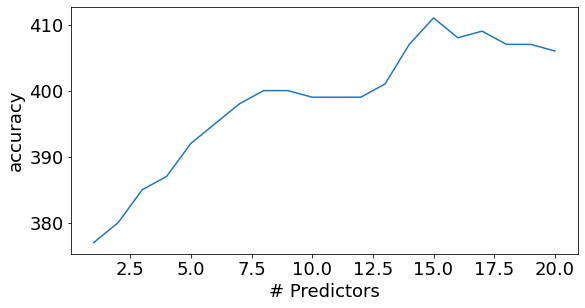

In [37]:
# Catherine

# PREPARATION AND FORWARD SELECTION

#characters = characters_clean_copy
culture = characters.culture
house_alive_binned = characters.house_alive_binned
characters = pd.get_dummies(characters, columns=["culture"])

new_characters = characters
X = new_characters.drop(columns=["name","isAlive","house_alive_binned","house_alive","house"])
X_backup = new_characters.drop(columns=["name","isAlive","house_alive_binned","house_alive","house"])


#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    print('isAlive~' + '+'.join(predictor_subset))
    formula = 'isAlive~' + '+'.join(predictor_subset)
    accuracy, __, model = test(formula = 'isAlive~' + '+'.join(predictor_subset), num_examples = len(characters), cutoff=.5, clean_data=characters)
    return {"model":model, "accuracy":accuracy, "formula":formula}
    
def forward(predictors):
    
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    models = pd.DataFrame(results)
    print(models)
    best_model = models.loc[models['accuracy'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    return best_model

def forward_selection():
    models_best = pd.DataFrame(columns=["accuracy", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["accuracy"])
    plt.xlabel('# Predictors')
    plt.ylabel('accuracy')

models_best = forward_selection()
best_sub_plots()

In [58]:
models_best

,accuracy,model
1,377,<statsmodels.discrete.discrete_model.BinaryRes...
2,380,<statsmodels.discrete.discrete_model.BinaryRes...
3,385,<statsmodels.discrete.discrete_model.BinaryRes...
4,387,<statsmodels.discrete.discrete_model.BinaryRes...
5,392,<statsmodels.discrete.discrete_model.BinaryRes...
6,395,<statsmodels.discrete.discrete_model.BinaryRes...
7,398,<statsmodels.discrete.discrete_model.BinaryRes...
8,400,<statsmodels.discrete.discrete_model.BinaryRes...
9,400,<statsmodels.discrete.discrete_model.BinaryRes...
10,399,<statsmodels.discrete.discrete_model.BinaryRes...


In [59]:
models_best.loc[15,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                isAlive   No. Observations:                  493
Model:                          Logit   Df Residuals:                      477
Method:                           MLE   Df Model:                           15
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.3736
Time:                        16:42:34   Log-Likelihood:                -188.69
converged:                      False   LL-Null:                       -301.24
Covariance Type:            nonrobust   LLR p-value:                 1.615e-39
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.7400      0.466     -1.589      0.112      -1.653       0.173
culture_few_survive     -1.0560      0.628     -1.682      0.093      -2.287       0.175
house_alive1             0.9417      0.461      2.042      0.041       0.038       1.846
male                    -0.7138      0.303     -2.358      0.018      -1.307      -0.120
boolDeadRelations       -1.1858      0.481     -2.467      0.014      -2.128      -0.244
popularity               1.7501      0.778      2.249      0.025       0.225       3.275
culture_none_survive    -1.8133      2.337     -0.776      0.438      -6.394       2.767
house_alive3             1.6647      0.452      3.682      0.000       0.778       2.551
culture_all_survive      2.7994      1.423      1.967      0.049       0.010       5.588
house_alive6             3.6193      1.032      3.507      0.000       1.597       5.642
house_alive2             0.6415      0.871      0.736      0.461      -1.066       2.349
house_alive4             1.7594      0.785      2.241      0.025       0.220       3.299
culture_many_survive     0.4496      0.293      1.533      0.125      -0.125       1.024
house_alive7             5.3964      0.845      6.384      0.000       3.740       7.053
house_alive5             2.8024      0.517      5.422      0.000       1.789       3.816
numDeadRelations         0.0543      0.101      0.535      0.593      -0.145       0.253
========================================================================================
"""

In [39]:
models_best.loc[15,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                isAlive   No. Observations:                  493
Model:                          Logit   Df Residuals:                      477
Method:                           MLE   Df Model:                           15
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.3736
Time:                        16:38:27   Log-Likelihood:                -188.69
converged:                      False   LL-Null:                       -301.24
Covariance Type:            nonrobust   LLR p-value:                 1.615e-39
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.7400      0.466     -1.589      0.112      -1.653       0.173
culture_few_survive     -1.0560      0.628     -1.682      0.093      -2.287       0.175
house_alive1             0.9417      0.461      2.042      0.041       0.038       1.846
male                    -0.7138      0.303     -2.358      0.018      -1.307      -0.120
boolDeadRelations       -1.1858      0.481     -2.467      0.014      -2.128      -0.244
popularity               1.7501      0.778      2.249      0.025       0.225       3.275
culture_none_survive    -1.8133      2.337     -0.776      0.438      -6.394       2.767
house_alive3             1.6647      0.452      3.682      0.000       0.778       2.551
culture_all_survive      2.7994      1.423      1.967      0.049       0.010       5.588
house_alive6             3.6193      1.032      3.507      0.000       1.597       5.642
house_alive2             0.6415      0.871      0.736      0.461      -1.066       2.349
house_alive4             1.7594      0.785      2.241      0.025       0.220       3.299
culture_many_survive     0.4496      0.293      1.533      0.125      -0.125       1.024
house_alive7             5.3964      0.845      6.384      0.000       3.740       7.053
house_alive5             2.8024      0.517      5.422      0.000       1.789       3.816
numDeadRelations         0.0543      0.101      0.535      0.593      -0.145       0.253
========================================================================================
"""

In [63]:
formula = "isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3+culture_all_survive+house_alive6+house_alive2+house_alive4+culture_many_survive+house_alive7+house_alive5+numDeadRelations"
model = sm.logit(formula = formula, data=characters).fit(method="bfgs")

         Current function value: 0.382744
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


Text(0, 0.5, 'Residuals')

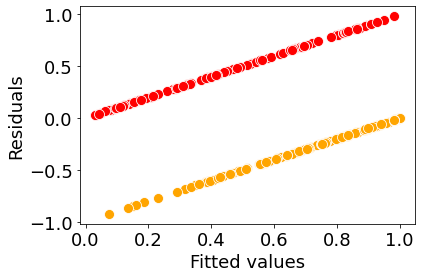

In [64]:
# Catherine

alive = characters.loc[characters["isAlive"]==1]
dead = characters.loc[characters["isAlive"]==0]
resid = model.predict(characters) - characters["isAlive"]
ax = sns.scatterplot(x = model.predict(alive), y=model.predict(alive)-1,color = 'orange')
sns.scatterplot(x = model.predict(dead), y=model.predict(dead),color = 'red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

<AxesSubplot:ylabel='Count'>

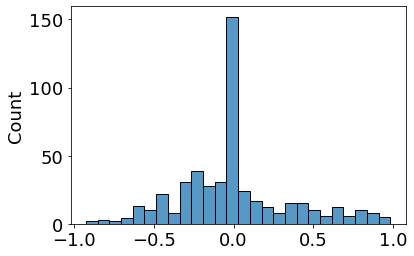

In [65]:
# Catherine

resid = model.predict(characters) - characters["isAlive"]
sns.histplot(resid)

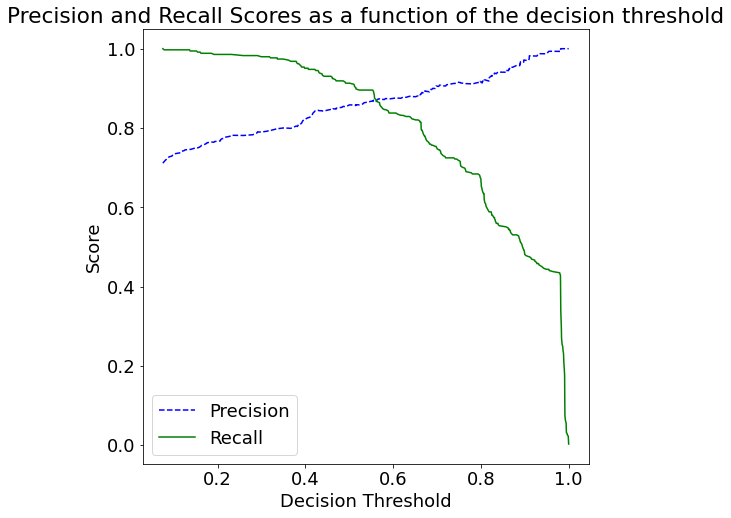

In [66]:
# Catherine

from sklearn.metrics import precision_recall_curve
y=characters.isAlive
ypred = model.predict(characters)
p, r, thresholds = precision_recall_curve(y, ypred)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [67]:
# Catherine

formula = "isAlive~culture_few_survive+house_alive1+male+boolDeadRelations+popularity+culture_none_survive+house_alive3+culture_all_survive+house_alive6+house_alive2+house_alive4+culture_many_survive+house_alive7+house_alive5+numDeadRelations"
model = sm.logit(formula = formula, data=characters).fit(method="bfgs")

         Current function value: 0.382744
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


In [73]:
# Catherine

acc, conf_mat, __ = test(formula=formula, num_examples=493, clean_data=characters)
print("accuracy = ", acc/len(characters))
print("confusion matrix: ", conf_mat)

accuracy =  0.768762677484787
confusion matrix:  [[258, 27], [87, 121]]


In [71]:
models_best.loc[15,"accuracy"]

411

Since it predicted 411/500 during forward selection, this is an accuracy of 82.2%